## 1.USA.gov Data from Bitly

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [2]:
import json
path = 'example.txt'
records = [json.loads(line) for line in open(path)]

### Counting Time Zones in Pure Python

In [3]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [4]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [5]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [6]:
counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

3440

In [7]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [8]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [9]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas

In [10]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()
frame['tz'][:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [11]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [12]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [13]:
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

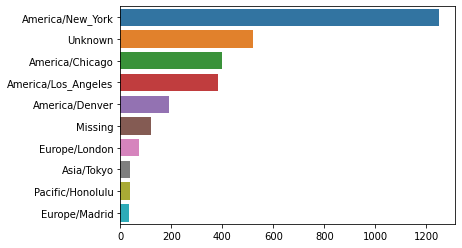

In [14]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [15]:
frame['a'][1]
frame['a'][50]
frame['a'][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [16]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [17]:
cframe = frame[frame.a.notnull()]

In [18]:
cframe = cframe.copy()

In [19]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [20]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [21]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [22]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [23]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [24]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [25]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

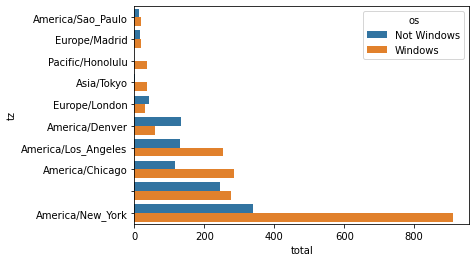

In [26]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [27]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

In [28]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

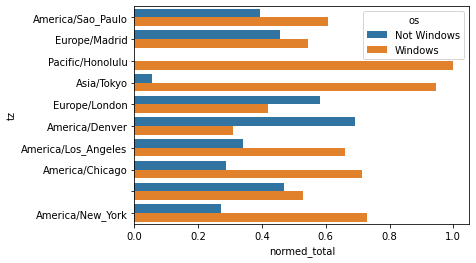

In [29]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)

In [30]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## MovieLens 1M Dataset

In [31]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [32]:
users[:5]
ratings[:5]
movies[:5]
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [33]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [34]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [35]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [36]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [37]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [38]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring Rating Disagreement

In [39]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [40]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [41]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [42]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US Baby Names 1880–2010

In [43]:
!head -n 10 datasets/babynames/yob1880.txt

head: cannot open 'datasets/babynames/yob1880.txt' for reading: No such file or directory


In [44]:
import pandas as pd
names1880 = pd.read_csv('yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [45]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [46]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [47]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


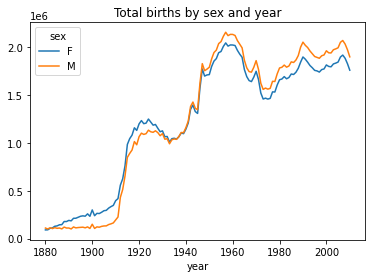

In [48]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()
total_births.plot(title='Total births by sex and year')

In [49]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [50]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [51]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [52]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [53]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### Analyzing Naming Trends

In [54]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [55]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e86b33b10>,
      dtype=object)

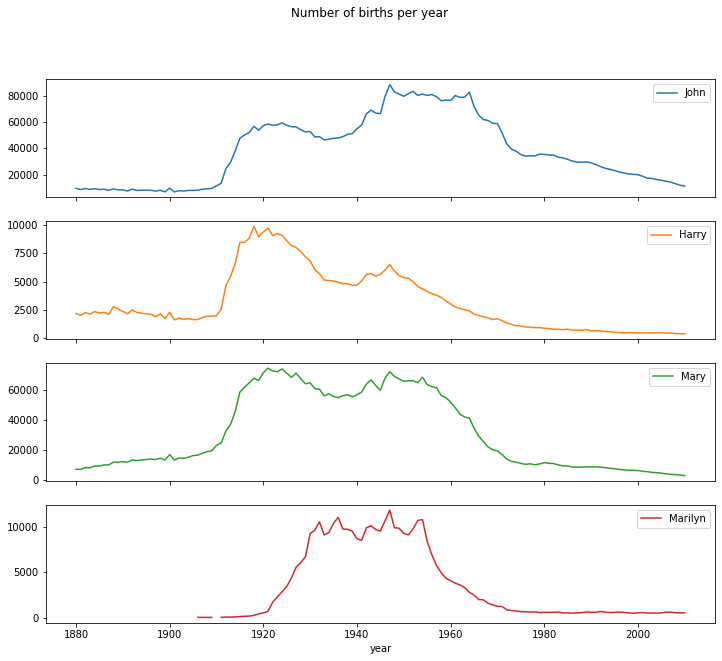

In [56]:
total_births.info()
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity

In [57]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

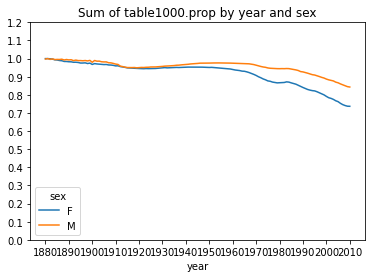

In [58]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [59]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [60]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

116

In [61]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [62]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [63]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

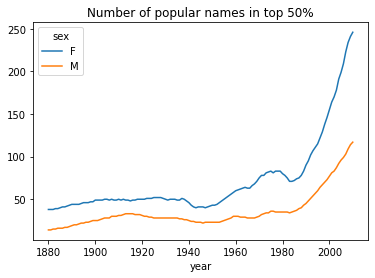

In [64]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

#### The “last letter” revolution

In [65]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [66]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [67]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

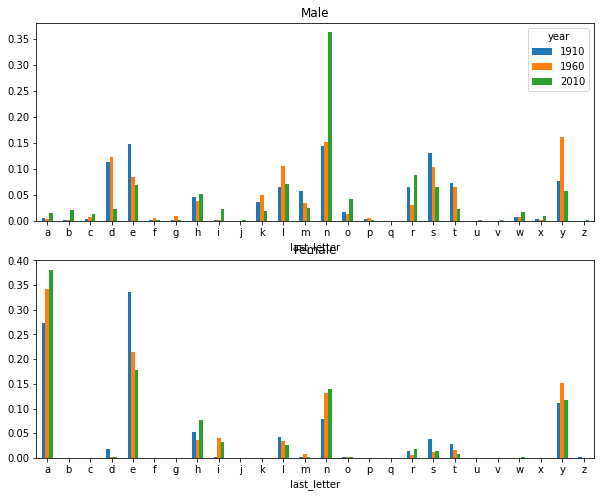

In [68]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [69]:
plt.subplots_adjust(hspace=0.25)

<Figure size 432x288 with 0 Axes>

In [70]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [71]:
plt.close('all')

In [72]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

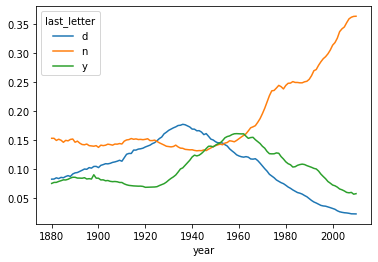

In [73]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [74]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [75]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [76]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


In [77]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

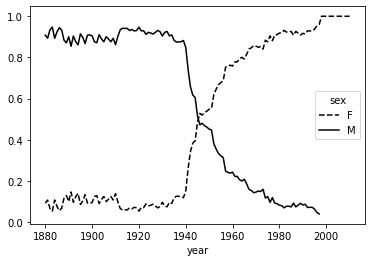

In [78]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## USDA Food Database

In [79]:
import json
db = json.load(open('database.json'))
len(db)

6636

In [80]:
db[0].keys()
db[0]['nutrients'][0]
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [81]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [82]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [83]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [84]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [85]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [86]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [87]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [88]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

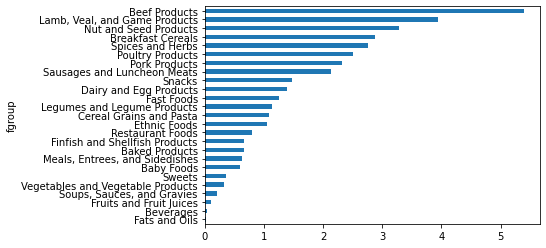

In [89]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [90]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [91]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 2012 Federal Election Commission Database

In [92]:
fec = pd.read_csv('P00000001-ALL.csv')
fec.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487338 entries, 0 to 487337
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            487338 non-null  object 
 1   cand_id            487338 non-null  object 
 2   cand_nm            487338 non-null  object 
 3   contbr_nm          487338 non-null  object 
 4   contbr_city        487331 non-null  object 
 5   contbr_st          487334 non-null  object 
 6   contbr_zip         487290 non-null  object 
 7   contbr_employer    483493 non-null  object 
 8   contbr_occupation  483447 non-null  object 
 9   contb_receipt_amt  487338 non-null  float64
 10  contb_receipt_dt   487338 non-null  object 
 11  receipt_desc       6702 non-null    object 
 12  memo_cd            59292 non-null   object 
 13  memo_text          62454 non-null   object 
 14  form_tp            487337 non-null  object 
 15  file_num           487337 non-null  float64
dtypes:

In [93]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num             772372.0
Name: 123456, Length: 16, dtype: object

In [94]:
unique_cands = fec.cand_nm.unique()
unique_cands
unique_cands[2]

'Obama, Barack'

In [95]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [96]:
fec.cand_nm[123456:123461]
fec.cand_nm[123456:123461].map(parties)
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      379698
Republican    107640
Name: party, dtype: int64

In [97]:
(fec.contb_receipt_amt > 0).value_counts()

True     482319
False      5019
Name: contb_receipt_amt, dtype: int64

In [98]:
fec = fec[fec.contb_receipt_amt > 0]

In [99]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer

In [100]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   123484
ATTORNEY                                   21000
INFORMATION REQUESTED                      15727
HOMEMAKER                                  15129
INFORMATION REQUESTED PER BEST EFFORTS     12545
PHYSICIAN                                  11703
PROFESSOR                                   7494
TEACHER                                     7470
CONSULTANT                                  7059
NOT EMPLOYED                                6254
Name: contbr_occupation, dtype: int64

In [101]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [102]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [103]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,7058562.05,5369018.82
CEO,1368853.99,2326847.03
CONSULTANT,1669617.15,1426394.01
EXECUTIVE,879044.56,2301447.03
HOMEMAKER,2821709.54,8150496.22
INVESTOR,578598.00,1542595.12
NOT PROVIDED,3030672.85,11423184.84
PHYSICIAN,2412829.44,1369323.96
PRESIDENT,1185997.95,2499474.89


In [104]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

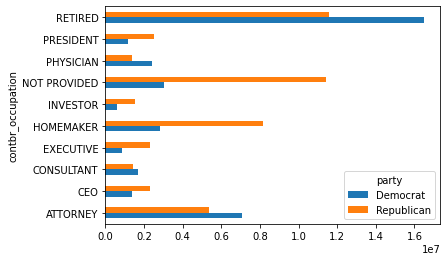

In [105]:
over_2mm.plot(kind='barh')

In [106]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [107]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  14742048.82
               SELF-EMPLOYED            10742188.58
               NOT EMPLOYED              5687086.00
               INFORMATION REQUESTED     3162861.16
               HOMEMAKER                 1750997.91
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### Bucketing Donation Amounts

In [108]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
487333    (100, 1000]
487334      (10, 100]
487335    (100, 1000]
487336      (10, 100]
487337    (100, 1000]
Name: contb_receipt_amt, Length: 481910, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] <
                                         (1000, 10000] < (10000, 100000] < (100000, 1000000] <
                                         (1000000, 10000000]]

In [109]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",435,77
"(1, 10]",26556,3681
"(10, 100]",237240,31853
"(100, 1000]",98132,43357
"(1000, 10000]",14383,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [110]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

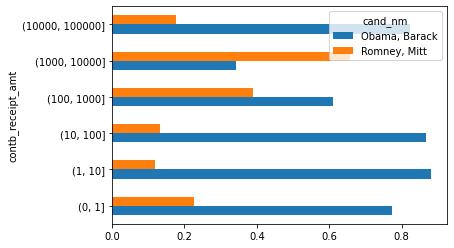

In [111]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

### Donation Statistics by State

In [112]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [113]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
